# AfroAI-VaxDemand: Predicting Regional Vaccine Demand Using Machine Learning

> ***Brief Description:***
Accurate prediction of regional vaccine demand is essential for guiding local vaccine manufacturing and distribution in Africa. This project develops a machine learning model to classify vaccine demand levels (Low, Medium, High) using regional uptake and organizational data. The goal is to enable data-driven planning that supports efficient local production and supply chain management.


# Case Study and Implementation




In [42]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Neural network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# The Dataset

***Dataset Description***
The dataset, cleaned_vaccine_data.csv, contains records related to vaccine uptake across various regions and organizations. Each row represents a data point for a specific region-organization instance and includes:

Region: The geographical area where the vaccine program was implemented.

Org_Name: The name of the organization managing or supporting the vaccination effort.

Uptake_Percent: The percentage of vaccines that were utilized or administered in that region.

demand_level (derived): A categorical variable derived from Uptake_Percent to indicate whether demand was:**Low, Medium, High**

The demand_level is the target variable to be predicted.

In [43]:
# Loading Data
df = pd.read_csv('cleaned_vaccine_data.csv', encoding='ISO-8859-1', skiprows=16)
df.head()


,Table 5: Influenza vaccination by staff group,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Region code,Region,Org code,Trust name,All frontline HCWs:\ninvolved with direct pati...,All frontline HCWs:\nvaccinated (n),All frontline HCWs:\npercentage vaccine uptake,All doctors:\ninvolved with direct patient car...,All doctors:\nvaccinated (n),All doctors:\npercentage vaccine uptake,Qualified nurses (including GP practice nurse...,Qualified nurses (including GP practice nurse...,Qualified nurses (including GP practice nurse...,All other professionally qualified clinical st...,All other professionally qualified clinical st...,All other professionally qualified clinical st...,All support staff:\ninvolved with direct patie...,All support staff:\nvaccinated (n),All support staff:\npercentage vaccine uptake
1,Y61,East of England Commissioning Region,RC9,Bedfordshire Hospitals NHS Foundation Trust,"7,911","4,077",51.5,"1,506",856,56.8,"2,839","1,585",55.8,"1,025",564,55.0,"2,541","1,072",42.2
2,Y61,East of England Commissioning Region,RGT,Cambridge University Hospitals NHS Foundation ...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,Y61,East of England Commissioning Region,RT1,Cambridgeshire And Peterborough NHS Foundation...,"4,529","1,302",28.7,209,65,31.1,"1,210",370,30.6,"1,021",347,34.0,"2,089",520,24.9
4,Y61,East of England Commissioning Region,RYV,Cambridgeshire Community Services NHS Trust,"2,000","1,109",55.5,108,67,62.0,815,438,53.7,438,272,62.1,639,332,52.0


In [44]:
df = df.rename(columns={
    df.columns[0]: 'Region',
    df.columns[2]: 'Org_Code',
    df.columns[3]: 'Org_Name',
    df.columns[6]: 'Uptake_Percent'
})

df = df[['Region', 'Org_Name', 'Uptake_Percent']]


In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert percentage string to float
df['Uptake_Percent'] = df['Uptake_Percent'].str.replace('%', '').str.strip()
df['Uptake_Percent'] = pd.to_numeric(df['Uptake_Percent'], errors='coerce')

# Drop rows with missing uptake values
df = df.dropna(subset=['Uptake_Percent'])

# Define demand categories
def demand_category(uptake):
    if uptake < 50:
        return 'Low'
    elif uptake < 75:
        return 'Medium'
    else:
        return 'High'

df['demand_level'] = df['Uptake_Percent'].apply(demand_category)

# Encode categorical features
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Org_Name'] = LabelEncoder().fit_transform(df['Org_Name'])

# Define features and labels
X = df[['Region', 'Org_Name', 'Uptake_Percent']]
y = LabelEncoder().fit_transform(df['demand_level'])

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
import numpy as np

# Assuming y_train, y_val, and y_test are label-encoded versions of demand levels
print("Training set class distribution:", np.bincount(y_train))
print("Validation set class distribution:", np.bincount(y_val))
print("Test set class distribution:", np.bincount(y_test))

Training set class distribution: [  2 100  51]
Validation set class distribution: [ 0 24  9]
Test set class distribution: [ 1 21 11]


#SECTION 1: Model Architecture:





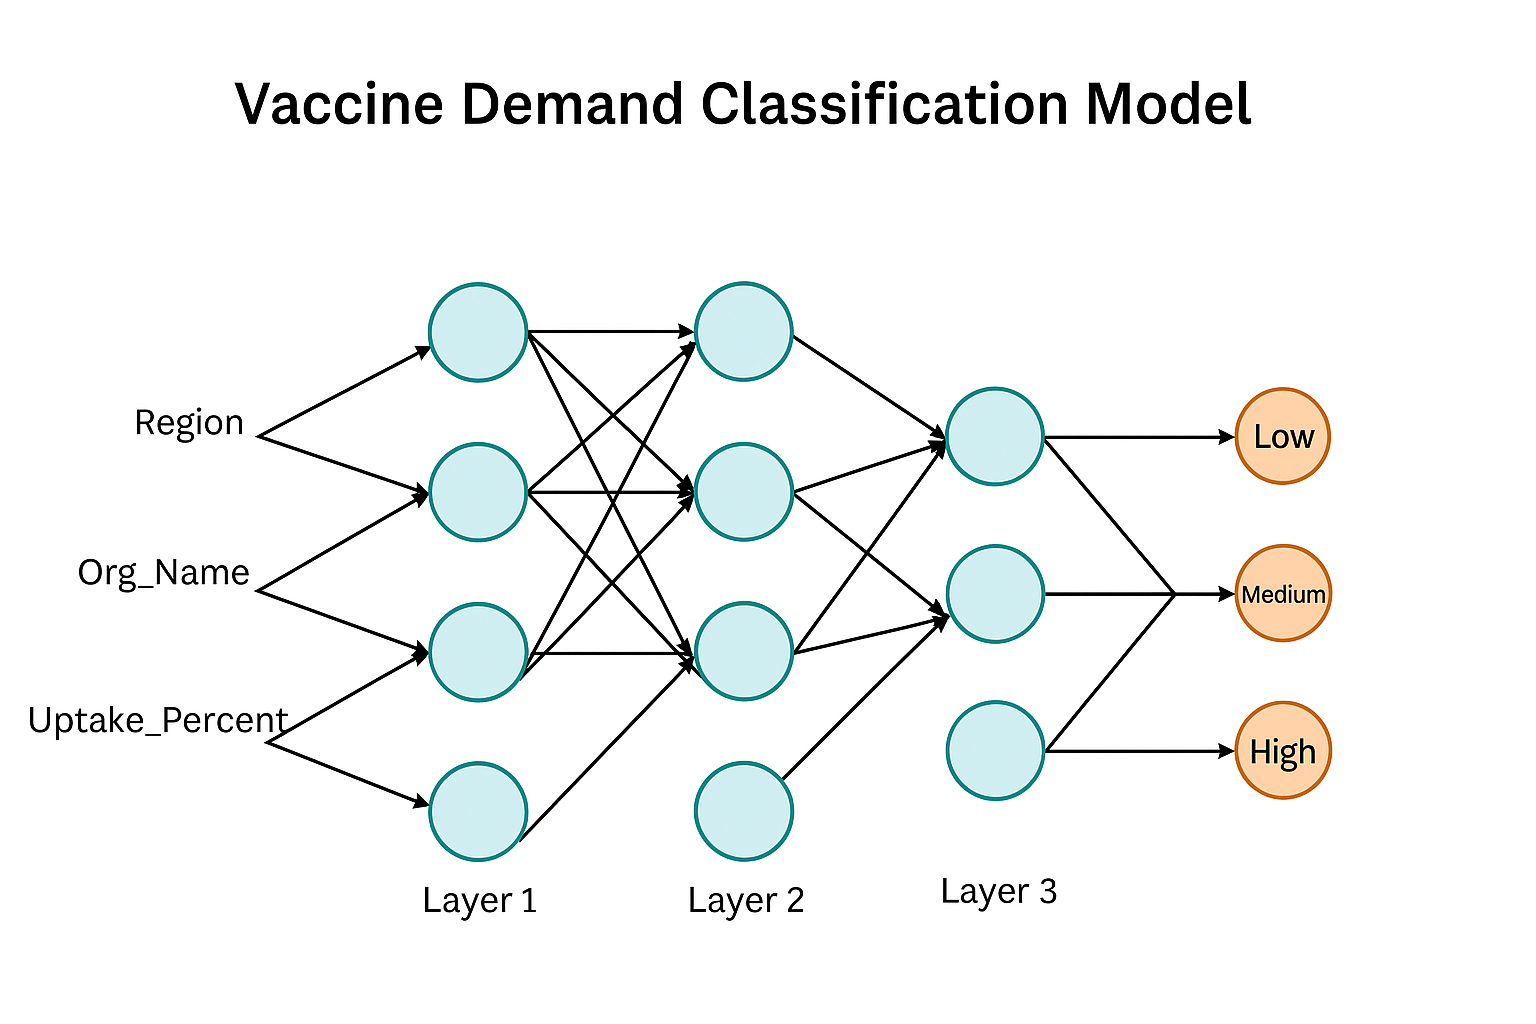

In [47]:
from IPython.display import Image, display

display(Image(filename='Vaccine demand classification model.png'))

# ML Algorithm: Logistic Regression

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\metrics

Best Hyperparameters: {'C': 10, 'max_iter': 200, 'solver': 'newton-cg'}

Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



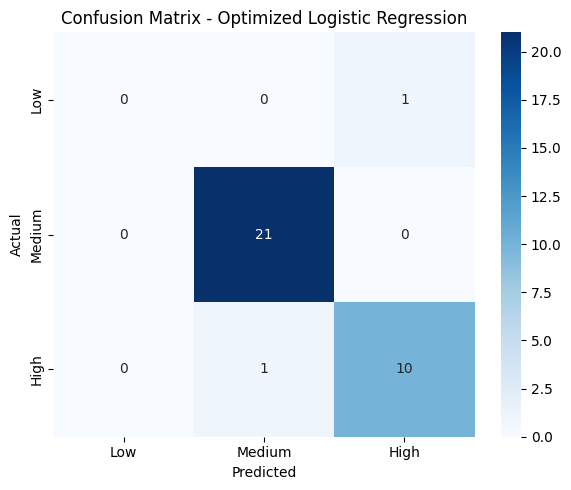

ROC AUC Score (macro-average): 0.9972
Optimized model saved as: saved_models/model_logreg_optimized.pkl


In [48]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [200, 500, 1000]
}

# Set up and run grid search
log_reg = LogisticRegression(multi_class='multinomial')
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Evaluation - Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.tight_layout()
plt.show()

# ROC AUC Score (macro-average)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print("ROC AUC Score (macro-average):", round(roc_auc, 4))

# Save the model
joblib.dump(best_model, 'saved_models/model_logreg_optimized.pkl')
print("Optimized model saved as: saved_models/model_logreg_optimized.pkl")


In [49]:
import os

if not os.path.exists("saved_models"):
    os.makedirs("saved_models")

## Task: Define a function that creates models without hyperparameters

In [50]:
# Simple Neural Network model without Optimization Techniques
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
simple_model = Sequential()
simple_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
simple_model.add(Dense(16, activation='relu'))
simple_model.add(Dense(3, activation='softmax'))  # For 3 classes: Low, Medium, High

# Compile the model
simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (with default settings)
simple_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.2816 - loss: 1.1075 - val_accuracy: 0.4545 - val_loss: 1.0484
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4846 - loss: 1.0384 - val_accuracy: 0.7273 - val_loss: 0.9880
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6325 - loss: 0.9945 - val_accuracy: 0.8182 - val_loss: 0.9310
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8309 - loss: 0.9319 - val_accuracy: 0.8788 - val_loss: 0.8757
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8058 - loss: 0.8784 - val_accuracy: 0.8788 - val_loss: 0.8257
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.8284 - loss: 0.8396 - val_accuracy: 0.9091 - val_loss: 0.7806
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8688 - loss: 0.7917 - val_accuracy: 0.8788 - val_loss: 0.7363
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8918 - loss: 0.7362 - val_accuracy: 0.8788 - val_loss: 0.6953

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



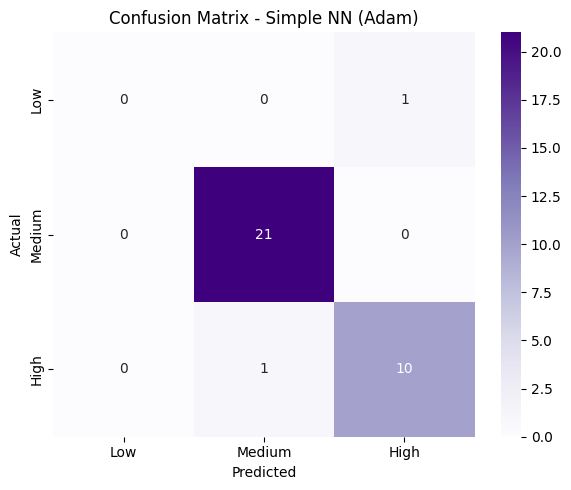

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities and class labels
y_pred_proba = simple_model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'], zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Simple NN (Adam)")
plt.tight_layout()
plt.show()

In [52]:
simple_model.save('saved_models/model_nn_simple_baseline.h5')

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2, l1

def define_model(model_type):
    model = Sequential()

    if model_type == 'Adam':
        # Simpler structure with dropout
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.005)))
        model.add(Dense(3, activation='softmax'))
        opt = Adam(learning_rate=0.005)

    elif model_type == 'RMSprop':
        # More complex structure with L2 regularization
        model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.1)))
        model.add(Dropout(0.7))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.7))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        opt = RMSprop(learning_rate=0.1)

    elif model_type == 'SGD':
        # Simpler model with L1 regularization and momentum
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.00005)))
        model.add(Dropout(0.5))
        model.add(Dense(3, activation='softmax'))
        opt = SGD(learning_rate=0.001, momentum=0.8)

    else:
        raise ValueError("Unknown model_type. Use 'Adam', 'RMSprop', or 'SGD'.")

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [55]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Class weights
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(enumerate(class_weights))

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [56]:
import matplotlib.pyplot as plt

def loss_curve_plot(model):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=20, batch_size=32, verbose=1)

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model):
    # Predict class probabilities
    y_pred_proba = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = y_pred_proba.argmax(axis=1)

    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_proba = model.predict(X_test)  # probabilities, not argmax yet
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
    print("ROC AUC Score (macro-average):", round(roc_auc, 4))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'], zero_division=0))

Epoch 1/20


c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5524 - loss: 2.2444 - val_accuracy: 0.7576 - val_loss: 1.8474
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7783 - loss: 1.7801 - val_accuracy: 0.7576 - val_loss: 1.5318
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8114 - loss: 1.5011 - val_accuracy: 0.9091 - val_loss: 1.2862
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8440 - loss: 1.3009 - val_accuracy: 0.9394 - val_loss: 1.0997
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8979 - loss: 1.1062 - val_accuracy: 0.9394 - val_loss: 0.9583
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8992 - loss: 0.9952 - val_accuracy: 0.9697 - val_loss: 0.8161
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9605 - loss: 0.8194 - val_accuracy: 0.9697 - val_loss: 0.6977
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9096 - loss: 0.7265 - val_accuracy: 0.9697 - val_loss: 0.6004
Epoch 9/20


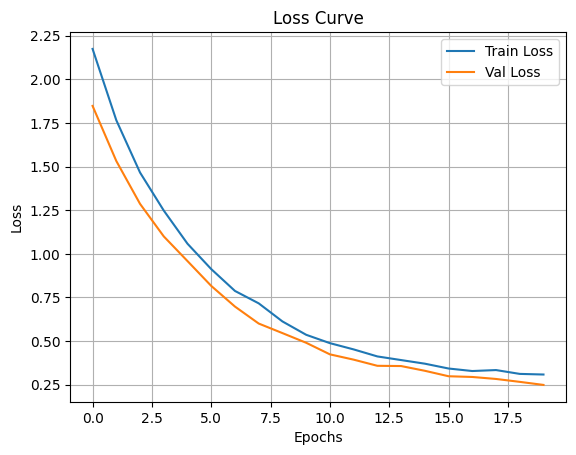

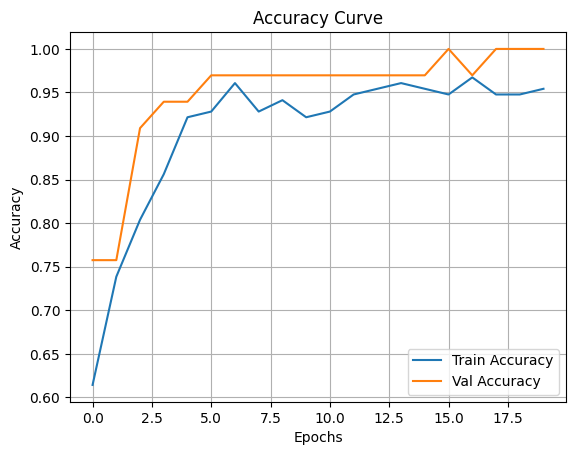

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ROC AUC Score (macro-average): 0.9862


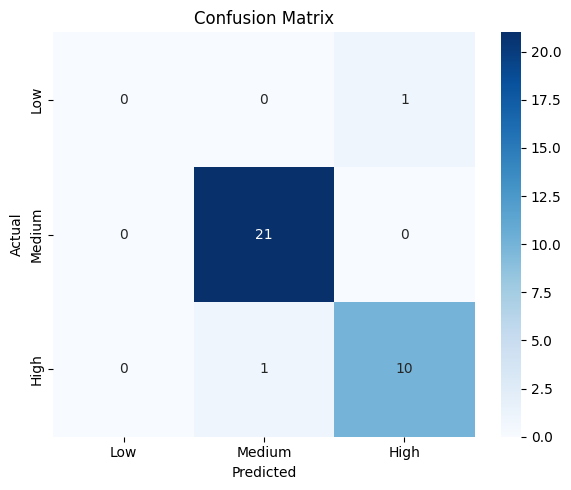

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



In [58]:
# Model 1: Adam
model_1 = define_model('Adam')
loss_curve_plot(model_1)
evaluate_model(model_1)
model_1.save('saved_models/model_nn_adam.h5')

c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.4476 - loss: 38.9950 - val_accuracy: 0.7273 - val_loss: 12.0733
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6176 - loss: 11.9711 - val_accuracy: 0.8788 - val_loss: 4.1183
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7362 - loss: 4.4318 - val_accuracy: 0.8182 - val_loss: 3.0251
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7618 - loss: 3.1358 - val_accuracy: 0.7576 - val_loss: 2.5483
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7366 - loss: 2.6357 - val_accuracy: 0.7273 - val_loss: 1.8940
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7284 - loss: 1.9819 - val_accuracy: 0.7576 - val_loss: 1.4308
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6892 - loss: 1.4932 - val_accuracy: 0.8788 - val_loss: 1.1890
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7922 - loss: 1.4088 - val_accuracy: 0.7273 - val_loss: 1.00

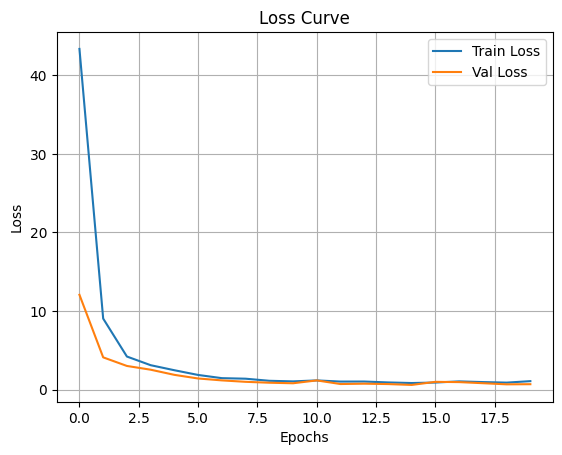

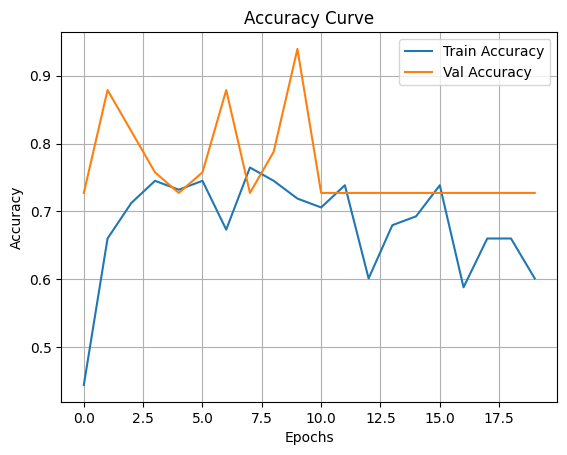

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ROC AUC Score (macro-average): 0.9347


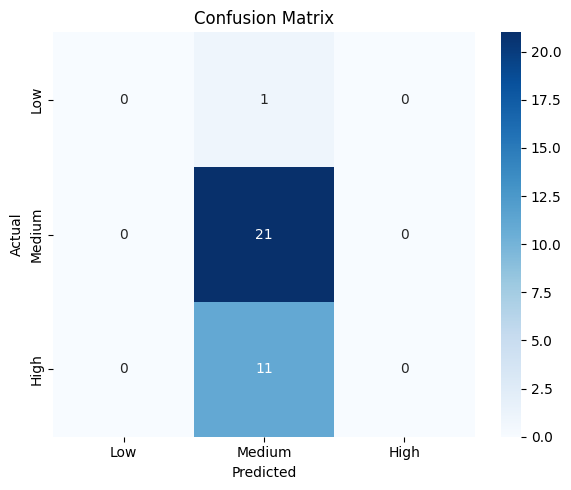

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.64      1.00      0.78        21
        High       0.00      0.00      0.00        11

    accuracy                           0.64        33
   macro avg       0.21      0.33      0.26        33
weighted avg       0.40      0.64      0.49        33



In [65]:
# Model 2: RMSprop
model_2 = define_model('RMSprop')
loss_curve_plot(model_2)
evaluate_model(model_2)
model_2.save('saved_models/model_nn_rmsprop.h5')

Epoch 1/20


c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.3085 - loss: 1.2018 - val_accuracy: 0.2121 - val_loss: 1.1877
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2225 - loss: 1.2249 - val_accuracy: 0.2424 - val_loss: 1.1695
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2482 - loss: 1.1860 - val_accuracy: 0.2424 - val_loss: 1.1492
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2721 - loss: 1.1773 - val_accuracy: 0.3333 - val_loss: 1.1288
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2956 - loss: 1.1843 - val_accuracy: 0.3939 - val_loss: 1.1091
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2664 - loss: 1.1891 - val_accuracy: 0.5152 - val_loss: 1.0902
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4068 - loss: 1.0886 - val_accuracy: 0.6061 - val_loss: 1.0714
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4142 - loss: 1.0909 - val_accuracy: 0.6061 - val_loss: 1.0532
Epoch 9/20


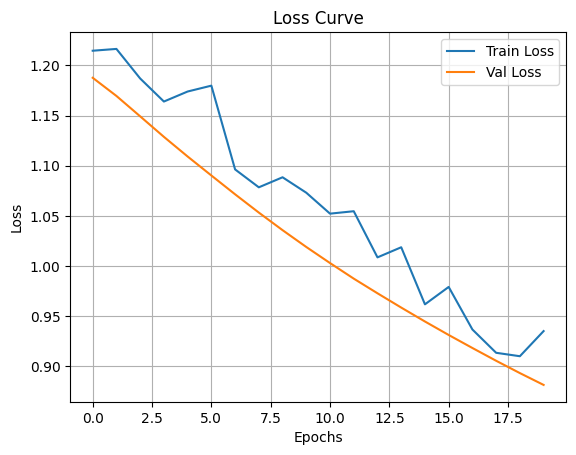

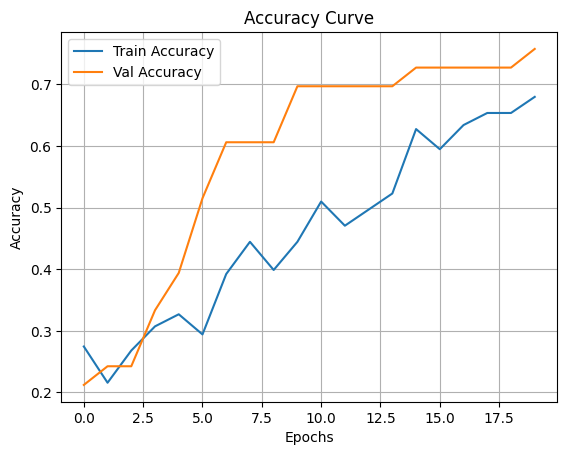

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ROC AUC Score (macro-average): 0.7682


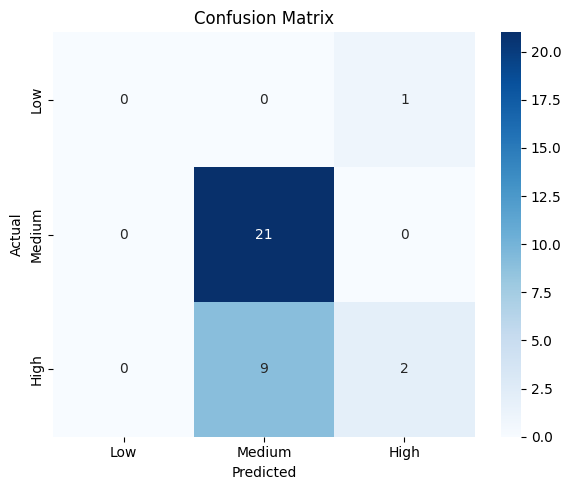

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.70      1.00      0.82        21
        High       0.67      0.18      0.29        11

    accuracy                           0.70        33
   macro avg       0.46      0.39      0.37        33
weighted avg       0.67      0.70      0.62        33



In [60]:
# Model 3: SGD
model_3 = define_model('SGD')
loss_curve_plot(model_3)
evaluate_model(model_3)
model_3.save('saved_models/model_nn_sgd.h5')

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later




In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved_models/best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

model = define_model('Adam')
model.fit(X_train, y_train,
          epochs=30,
          validation_data=(X_val, y_val),
          callbacks=[checkpoint])

Epoch 1/30


c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - accuracy: 0.3750 - loss: 2.3921

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6072 - loss: 2.2675 - val_accuracy: 0.8485 - val_loss: 1.9030
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8375 - loss: 1.8437 - val_accuracy: 0.8485 - val_loss: 1.5518
Epoch 3/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9062 - loss: 1.5478

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9013 - loss: 1.4960 - val_accuracy: 0.9394 - val_loss: 1.2954
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9591 - loss: 1.2104 - val_accuracy: 0.9394 - val_loss: 1.0959
Epoch 5/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9062 - loss: 1.3498

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9265 - loss: 1.1460 - val_accuracy: 0.9697 - val_loss: 0.9269
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9240 - loss: 0.9398 - val_accuracy: 0.9697 - val_loss: 0.8088
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9461 - loss: 0.8194 - val_accuracy: 0.9394 - val_loss: 0.7112
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9418 - loss: 0.6724 - val_accuracy: 0.9697 - val_loss: 0.6016
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9231 - loss: 0.6334 - val_accuracy: 0.9697 - val_loss: 0.5409
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9596 - loss: 0.5801 - val_accuracy: 0.9697 - val_loss: 0.4875
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9431 - loss: 0.5219 - val_accuracy: 0.9697 - val_loss: 0.4464
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9383 - loss: 0.4547 - val_accuracy: 0.9697 - val_loss: 0.4016
Epoch 13

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9426 - loss: 0.3149 - val_accuracy: 1.0000 - val_loss: 0.2654
Epoch 20/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9314 - loss: 0.3615 - val_accuracy: 1.0000 - val_loss: 0.2596
Epoch 21/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9483 - loss: 0.3318 - val_accuracy: 0.9394 - val_loss: 0.2724
Epoch 22/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9357 - loss: 0.3516 - val_accuracy: 1.0000 - val_loss: 0.2430
Epoch 23/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9618 - loss: 0.2984 - val_accuracy: 1.0000 - val_loss: 0.2276
Epoch 24/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9561 - loss: 0.2758 - val_accuracy: 1.0000 - val_loss: 0.2316
Epoch 25/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9457 - loss: 0.3063 - val_accuracy: 1.0000 - val_loss: 0.2222
Epoch 26/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9474 - loss: 0.2863 - val_accuracy: 0.9697 - val_loss: 0.2329
Epoc

In [63]:
model.save('saved_models/best_model.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


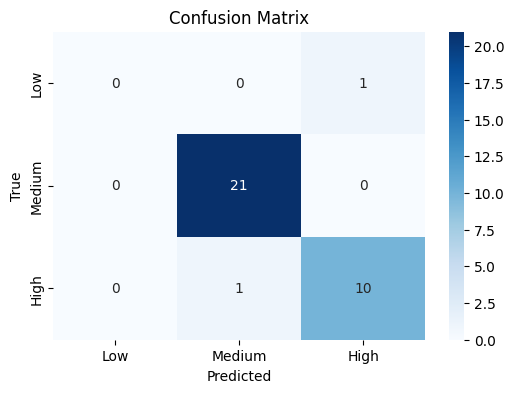

F1 Score: 0.9245947850599012

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nicolle School\intro_to_ml_summative_AfroAI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [64]:
from tensorflow.keras.models import load_model
import numpy as np

def make_predictions(model_path, X):
    # Load the saved model
    model = load_model(model_path)

    # Make predictions (probabilities for each class)
    probas = model.predict(X)

    # Convert probabilities to class labels (0, 1, or 2)
    predictions = np.argmax(probas, axis=1)

    return predictions

# Load predictions
model_path = "saved_models/best_model.h5"
y_pred = make_predictions(model_path, X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# F1 Score and Report
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

Congratulations!!
